In [4]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

# 1) Acquire, prepare & split your data.

In [5]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_iris():
    my_query="""
            SELECT *
            FROM measurements as m
            JOIN species as s
            USING (species_id)
        """
    df = pd.read_sql(my_query, get_connection('iris_db'))
    return df

In [6]:
# Acquire:

df = get_iris()
df.head().T

,0,1,2,3,4
species_id,1,1,1,1,1
measurement_id,1,2,3,4,5
sepal_length,5.1,4.9,4.7,4.6,5.0
sepal_width,3.5,3.0,3.2,3.1,3.6
petal_length,1.4,1.4,1.3,1.5,1.4
petal_width,0.2,0.2,0.2,0.2,0.2
species_name,setosa,setosa,setosa,setosa,setosa


In [7]:
# Prepare: 
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [8]:
df = prep_iris_inline(df)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# Split:

def train_validate_test_split(df, target, seed=12345):
    train, test = train_test_split(df, train_size=0.8, 
                                   random_state=1349, 
                                   stratify=df.species)
    
    train, validate = train_test_split(train, train_size=0.7, 
                                       random_state=1349, 
                                       stratify=train.species)

    return train, validate, test

In [16]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(df, target='species')
train.shape, validate.shape, test.shape




((84, 5), (36, 5), (30, 5))

# 2) Univariate Stats

    - For each measurement type (quantitative variable): 
        create a histogram, boxplot, & compute descriptive 
        statistics (using .describe()).

    - For each species (categorical variable): create a frequency 
        table and a bar plot of those frequencies.

    - Document takeaways & any actions.

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [27]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


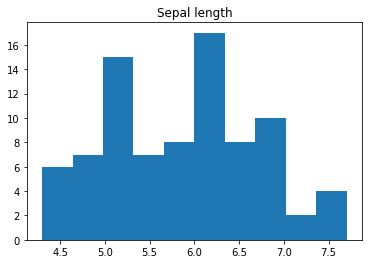

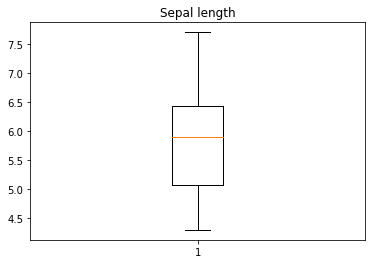

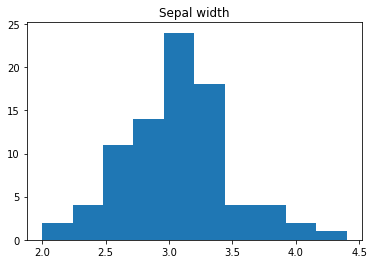

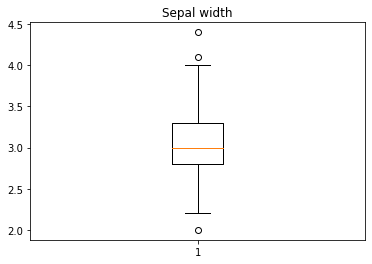

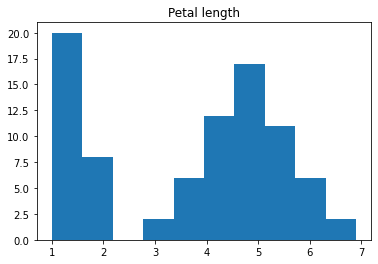

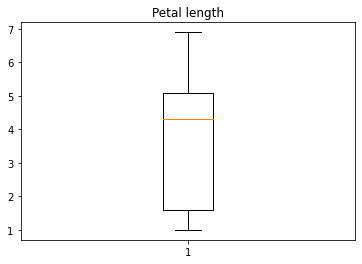

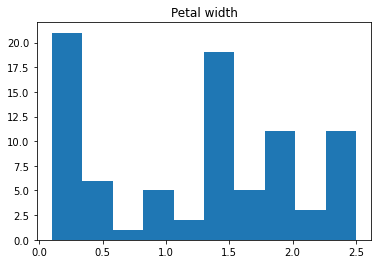

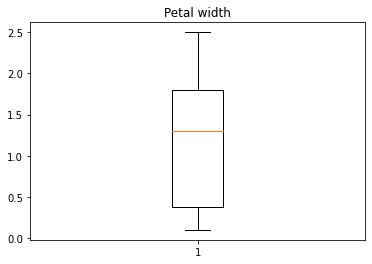

In [31]:
# Plot numeric columns
# define num_cols by datatype of float64
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()


In [32]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [ ]:
# Documented takeaways & any actions.